# Tracing Task Analysis

In [1]:
import cv2
import numpy as np
import scipy.stats as stats
import os
import pandas as pd
import matplotlib
from matplotlib import pylab, mlab, pyplot
import svgpathtools

In [2]:
# file path
analysis_dir = os.getcwd()
tracing_dir = os.path.join(analysis_dir, 'tracing')
sketch_dir = os.path.join(analysis_dir, 'cumulative_drawings')
#sketch_dir = os.path.join(analysis_dir, 'test')
data_dir = os.path.join(analysis_dir, 'usage_data')

### Compute F1 Scores

In [3]:
tracing = ['square', 'shape', 'this circle']
f1_scores = []
trace_img_list = []

for t in tracing:
    # find the tracing image and corresponding sketch folder
    fname = t + '.png'
    fpath = os.path.join(tracing_dir,fname)
    img_trace = cv2.imread(fpath)
    
    # turn white pixels into black. Keep all pixels not on the shape black
    pixels_trace = np.argwhere(img_trace.sum(axis=2) == 255*3)
    for p in pixels_trace:
        img_trace[p[0]][p[1]] = [0,0,0]
    
    
    # add padding to the tracing image. In the experiment, the tracing image only occupied 70% of the canvas
    old_size = img_trace.shape[:2]
    ratio = 0.7
    color = [0, 0, 0]
    new_width = old_size[1]/ratio
    left = int((new_width - old_size[1])/2)
    right = left
    top = int((new_width - old_size[0])/2)
    bottom = top
    img_trace = cv2.copyMakeBorder(img_trace, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    cv2.imwrite(os.path.join(tracing_dir, 'resize1_' + fname), img_trace)
        
    # resize the tracing image to the same size as the drawing image
    rows, cols = 432, 432 # the size of a given drawing image
    img_trace = cv2.resize(img_trace, (rows, cols))
    cv2.imwrite(os.path.join(tracing_dir, 'resize_' + fname), img_trace)
    trace_img_list.append(img_trace)

In [4]:
# get drawings from the sketchs folder
for kid in os.listdir(sketch_dir):
    if not kid.startswith('cdm'): continue
    print kid
    for t_index, t in enumerate(tracing):
#         print t
        img_trace = trace_img_list[t_index]
        session_id = kid.split('_')[2]
        age = kid.split('_')[3].replace('age','')
        if age == 'adult':
            age = -1
        else:
            age = int(age)

        trace_folder = str(t_index) + '_' + t
        draw_img_dir = os.path.join(sketch_dir,kid,trace_folder)

        if not os.path.exists(draw_img_dir): continue

        ## calculate F1 score for drawings 

        # import drawing
        file_list = sorted(os.listdir(draw_img_dir))
        img = file_list[-1]
        draw_fname = os.path.join(draw_img_dir, img)
        img_draw = cv2.imread(draw_fname)

        # true positive: pixel was tracing shape & drawer traced there: number of pixels that overlapped (HITS)
        # false positive: pixel was not tracing shape & drawer traced there: number of pixels that were drawn NOT on the shape (false alarms)
        # true negative; pixel was NOT tracing shape & drawer DID not draw there (white pixels outside of tracing shape) (correct rejections)
        # false negatives: pixel WAS the tracing shape & drawer DID NOT tracer there: number of pixels that should have been traced and were not (MISS)
        true_positive, true_negative, false_positive, false_negative = 0, 0, 0, 0

        for i in range(rows):
            for j in range(cols):
                # the background color of drawing is white and the background color of tracing is black

                if 255*3 > sum(img_draw[i][j]): # non-white pixels
                    if 255*3 > sum(img_trace[i][j])>0: # non-black pixels
                        true_positive +=1
                    else:
                        false_positive += 1

                else: # white background pixels on the drawing
                    if 255*3 > sum(img_trace[i][j]) > 0:
                        false_negative +=1
                    else:
                        true_negative += 1

        # calculate precision and recall
        precision, recall = 0, 0
        if true_positive != 0:
            precision = float(true_positive)/(true_positive + false_positive)
            recall = float(true_positive)/(true_positive + false_negative)

        # calculate the F1 score
        f1 = 0
        if precision + recall != 0:
            f1 = 2 * (precision * recall) / (precision + recall)
#         print f1
#         print precision, recall
#         print true_positive, false_positive, false_negative
        f1_scores.append([session_id, age, t, f1])

cdm_run_v31525887854758_age6
cdm_run_v31525889224904_age2
cdm_run_v31525892637212_age2
cdm_run_v31525893174061_age2
cdm_run_v31525893423612_age6
cdm_run_v31525893768237_age3
cdm_run_v31525893976840_age5
cdm_run_v31525894638556_age2
cdm_run_v31525895728803_age6
cdm_run_v31525897661521_age2
cdm_run_v31525899254114_age4
cdm_run_v31525901322190_age2
cdm_run_v31525901714819_age3
cdm_run_v31525902126553_adult
cdm_run_v31525904067360_age3
cdm_run_v31525908206117_age4
cdm_run_v31525908387543_age4
cdm_run_v31525908911986_age8
cdm_run_v31525973096978_adult
cdm_run_v31525974358965_age6
cdm_run_v31525974676521_age6
cdm_run_v31525975379407_age4
cdm_run_v31525976032935_age6
cdm_run_v31525976865876_age5
cdm_run_v31525984464310_age4
cdm_run_v31525984944345_age3
cdm_run_v31525990258467_age2
cdm_run_v31525992411710_age3
cdm_run_v31525992682386_age3
cdm_run_v31525993726883_age9
cdm_run_v31526060310716_age7
cdm_run_v31526060708396_age7
cdm_run_v31526060998610_age6
cdm_run_v31526061437727_age6
cdm_run_v315

cdm_run_v31527895362525_age2
cdm_run_v31527895799232_age4
cdm_run_v31527960599358_age8
cdm_run_v31527960931784_age8
cdm_run_v31527962399296_age2
cdm_run_v31527962824837_age2
cdm_run_v31527963107380_age3
cdm_run_v31527965399261_age3
cdm_run_v31527965999248_age3
cdm_run_v31527966780680_age4
cdm_run_v31527967199255_age3
cdm_run_v31527967589959_adult
cdm_run_v31527968718676_age2
cdm_run_v31527968860506_age2
cdm_run_v31527969599198_age2
cdm_run_v31527970199200_age10
cdm_run_v31527970381589_age10
cdm_run_v31527970799228_age4
cdm_run_v31527971399240_age3
cdm_run_v31527972038759_age7
cdm_run_v31527972599108_age2
cdm_run_v31527974237867_age6
cdm_run_v31527974399147_age6
cdm_run_v31527974678997_age6
cdm_run_v31527974999109_adult
cdm_run_v31527975212978_age4
cdm_run_v31527976577391_age10
cdm_run_v31527976799200_age4
cdm_run_v31527977786628_age6
cdm_run_v31527977844711_age6
cdm_run_v31527978599029_adult
cdm_run_v31527978734885_age3
cdm_run_v31527979199137_age3
cdm_run_v31527979692326_age5
cdm_run_

In [5]:
# write data to cvs files
print(len(f1_scores))
print (true_positive, true_negative, false_positive, false_negative)
print (img)
print f1

996
(466, 179446, 3558, 3154)
cdm_run_v31528325498957_0_square_9.png
0.121925693354


In [6]:
# write data to csv files
data = pd.DataFrame(f1_scores)
data.columns = ['sessionID', 'age', 'tracing_item', 'f1_score']
data.to_csv(os.path.join(data_dir,'f1_scores_svg.csv'))

### Visualization

#### Basic Visualization

Text(0.5,0,u'f1_scores')

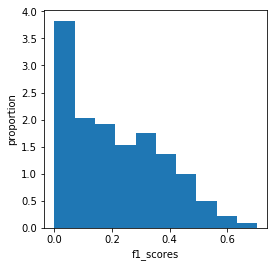

In [7]:
# show the F1 score ranges
plt = pyplot
fig = plt.figure(figsize=(4,4))
h = plt.hist(data.f1_score.values,normed=True)
plt.ylabel('proportion')
plt.xlabel('f1_scores')

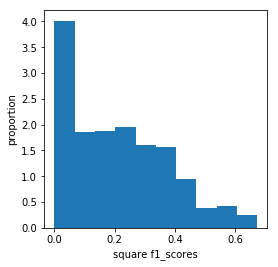

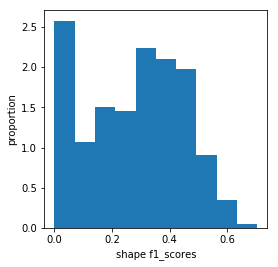

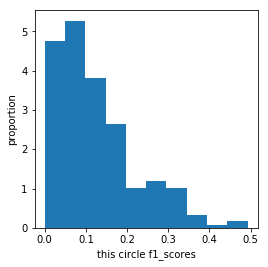

In [8]:
for index, t in enumerate(tracing):
    t_data = data.loc[data['tracing_item'] == t]
    fig = plt.figure(figsize=(4,4))
    h = plt.hist(t_data.f1_score.values,normed=True)
    plt.ylabel('proportion')
    plt.xlabel(t + ' f1_scores')

#### Age and F1 Scores (Absolute)

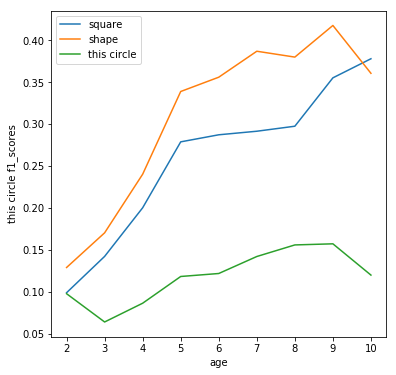

In [9]:
# Age and F1 score
min_age, max_age = 2, 10
age_range = range(min_age, max_age+1)

fig = plt.figure(figsize=(6,6))
line_list = []
for t in tracing:
    age_avg = []
    for age in age_range:
        current_age = data.loc[(data['age'] == age) & (data['tracing_item'] == t)]
        current_f1_scores = current_age.f1_score.values
        current_avg = np.average(current_f1_scores)
        if len(current_f1_scores)==0:
            age_avg.append(0)
        else:
            age_avg.append(current_avg)    

    p, = plt.plot(age_range, age_avg)
    line_list.append(p)
    plt.ylabel(t +' f1_scores')
    plt.xlabel('age')

plt.legend(line_list, tracing)


In [12]:
# correlations
for t in tracing:
    current_shape = data.loc[data['tracing_item'] == t]
    current_f1_scores = current_shape.f1_score.values
    current_age = current_shape.age.values
    print (t, stats.spearmanr(current_f1_scores, current_age))


('square', SpearmanrResult(correlation=0.3336695297952771, pvalue=1.5464319135772341e-12))
('shape', SpearmanrResult(correlation=0.30635157903880583, pvalue=1.2712936169147628e-08))
('this circle', SpearmanrResult(correlation=0.038047649785163735, pvalue=0.5583254536947699))


#### Shape and F1 Scores

Text(0,0.5,u'average f1_scores')

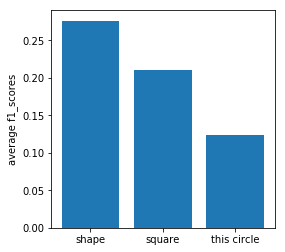

In [11]:
# Age and F1 score
tracing_avg = []
for t in tracing:
    current_shape = data.loc[(data['tracing_item'] == t)]
    current_f1_scores = current_shape.f1_score.values
    current_avg = np.average(current_f1_scores)
    if len(current_f1_scores)==0:
        tracing_avg.append(0)
    else:
        tracing_avg.append(current_avg)    

fig = plt.figure(figsize=(4,4))
p = plt.bar(tracing, tracing_avg)
plt.ylabel('average f1_scores')

